# 지도 시각화

## #01. 준비작업

### [1] 패키지 참조

`folium` 패키지가 설치되어 있어야 한다.

In [1]:
import folium
from pandas import read_excel
from os import path, mkdir

## #02. 지도 표현하기

### [1] 지도 객체 생성

지도의 중심이 되는 위도와 경도를 설정

In [2]:
# zoom_start: 배율 1~22
map_osm = folium.Map(location=[37.5004444, 127.0313861], zoom_start=17)
map_osm

### [2] 지도 객체에 마커 추가

#### (1) 일반 마커

아이콘 색상값 종류

> 'lightgreen', 'darkgreen', 'darkblue', 'cadetblue', 'orange', 'lightred', 'darkred', 'green', 'blue', 'black', 'lightblue', 'white', 'lightgray', 'red', 'pink', 'beige', 'gray', 'purple', 'darkpurple'

In [3]:
# 새로운 지도 객체 생성
map_osm1 = folium.Map(location=[37.5004444, 127.0313861], zoom_start=17)

# 마커 객체 생성
# -> 마커가 표시될 위치 [위도,경도], 클리시 표시될 메시지, 아이콘 색상
marker1 = folium.Marker([37.5004444, 127.0313861],
                        popup='메가스터디IT아카데미 강남',
                        icon=folium.Icon(color='darkred'))

marker1.add_to(map_osm1)  # 마커 객체를 지도에 추가함
map_osm1                  # 지도 표시하기

#### (2) 사용자 지정 아이콘, HTML 팝업


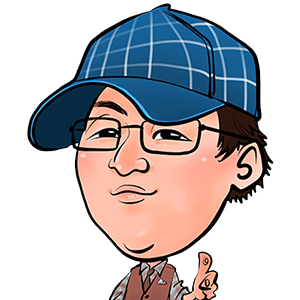

In [10]:
# 새로운 지도 객체 생성
map_osm2 = folium.Map(location=[37.5004444, 127.0313861], zoom_start=17)

# HTML을 사용한 팝업
popup_html = folium.Popup("<div style='white-space: nowrap'><h3>메가스터디IT아카데미 강남</h3><img src='https://img.megastudyacademy.co.kr/campus/iws_html_img/it_brand/sec08_img01.png' width='100%'><br/><p>tel: <a href='tel:07043380972'>070-4338-0972</a></p><p>서울특별시 강남구 강남대로94길 삼경빌딩 2층</p></div>", parse_html=False)

# 사용자 지정 아이콘 이미지 사용
# --> 온라인 상의 URL, 내 컴퓨터 상의 상대,절대경로 모두 가능함
# icon_img = folium.features.CustomIcon('https://data.hossam.kr/mapdata/ho.png', icon_size=(50, 50))
icon_img = folium.features.CustomIcon('./res/ho.png', icon_size=(50, 50))

# 마커 객체 생성
marker2 = folium.Marker([37.5004444, 127.0313861],
                        popup=popup_html,
                        icon=icon_img)

marker2.add_to(map_osm2) # 마커 객체를 지도에 추가함

# 웹 페이지 파일이 저장될 폴더 생성
if not path.exists('output'):
    mkdir('output')

map_osm2.save('output/map_osm2.html') #파일이 저장될 위치

map_osm2                 # 지도 표시하기

#### (3) 원형 마커(범위지정)

In [5]:
# 새로운 지도 객체 생성
map_osm3 = folium.Map(location=[37.5004444, 127.0313861], zoom_start=17)

# 마커 객체 생성
marker1 = folium.Marker([37.5004444, 127.0313861],
                        icon=folium.Icon(color='orange'))

# 원형마커
marker2 = folium.CircleMarker([37.5004444, 127.0313861],
                              radius=100,                 # 범위
                              color='#3186cc',            # 선 색상
                              fill_color='#3186cc')       # 면 색상

# 원형 마커 위에 아이콘 마커 올리기
marker2.add_to(map_osm3)
marker1.add_to(map_osm3)

map_osm3

## #03. (예제) 서울의 고등학교 분포 확인하기

### [1] 데이터 준비하기

전국 초,중,고 학교 위치 엑셀 파일을 원격으로 내려받아 데이터프레임으로 변환 (다소 시간이 소요된다.)

> 공공데이터 포털

In [13]:
origin = read_excel("https://data.hossam.kr/mapdata/school.xlsx")
origin

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000004204,한울초등학교,초등학교,2008-09-01,공립,본교,운영,경기도 화성시 향남읍 행정리 442,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),7530000,경기도교육청,7679000,경기도화성오산교육지원청,2013-11-29,2022-10-06,37.126961,126.917854,2023-03-22,C738100,청주대학교 지방교육재정연구원
1,B000011476,수원농생명과학고등학교,고등학교,1936-07-01,공립,본교,운영,경기도 수원시 장안구 영화동 109,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),7530000,경기도교육청,7541000,경기도수원교육지원청,2013-11-29,2022-10-06,37.295154,127.019450,2023-03-22,C738100,청주대학교 지방교육재정연구원
2,B000009647,녹양중학교,중학교,2008-03-01,공립,본교,운영,경기도 의정부시 녹양동 191-5,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),7530000,경기도교육청,7561000,경기도의정부교육지원청,2013-11-29,2022-10-06,37.761864,127.028084,2023-03-22,C738100,청주대학교 지방교육재정연구원
3,B000005955,초락초등학교,초등학교,1959-04-02,공립,본교,운영,충청남도 당진시 석문면 초락도리 210-3,충청남도 당진시 석문면 샛터말길 35 (석문면),8140000,충청남도교육청,8291000,충청남도당진교육지원청,2013-11-29,2022-10-06,36.993080,126.510472,2023-03-22,C738100,청주대학교 지방교육재정연구원
4,B000005385,상봉초등학교,초등학교,1946-09-01,공립,본교,운영,충청북도 청주시 흥덕구 오송읍 상봉리 242-1,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),8000000,충청북도교육청,8011000,충청북도청주교육지원청,2013-11-29,2022-10-06,36.638251,127.286142,2023-03-22,C738100,청주대학교 지방교육재정연구원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,B000003371,대전옥계초등학교,초등학교,1982-12-09,공립,본교,운영,대전광역시 중구 옥계동 65,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),7430000,대전광역시교육청,7441000,대전광역시동부교육지원청,2013-11-29,2022-10-06,36.301199,127.449039,2023-03-22,C738100,청주대학교 지방교육재정연구원
11984,B000003345,성덕초등학교,초등학교,2011-03-11,공립,본교,운영,광주광역시 광산구 장덕동 1042,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),7380000,광주광역시교육청,7401000,광주광역시서부교육지원청,2013-11-29,2022-10-06,35.199148,126.814301,2023-03-22,C738100,청주대학교 지방교육재정연구원
11985,B000005441,이월초등학교,초등학교,1920-04-01,공립,본교,운영,충청북도 진천군 이월면 송림리 667,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),8000000,충청북도교육청,8081000,충청북도진천교육지원청,2013-11-29,2022-10-06,36.931076,127.431922,2023-03-22,C738100,청주대학교 지방교육재정연구원
11986,B000009875,해안중학교,중학교,1979-03-08,공립,본교,운영,강원도 양구군 해안면 현리 143,강원도 양구군 해안면 펀치볼로 1279 (해안면),7800000,강원도교육청,7951000,강원도양구교육지원청,2013-11-29,2022-10-06,38.283771,128.135686,2023-03-22,C738100,청주대학교 지방교육재정연구원


### [2] 데이터 전처리

#### (1) 사용할 필드만 추출

In [7]:
df = origin.filter(['학교명', '학교급구분', '소재지도로명주소', '위도', '경도'])
df

,학교명,학교급구분,소재지도로명주소,위도,경도
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),37.126961,126.917854
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),37.295154,127.019450
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),37.761864,127.028084
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면),36.993080,126.510472
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),36.638251,127.286142
...,...,...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),36.301199,127.449039
11984,성덕초등학교,초등학교,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),35.199148,126.814301
11985,이월초등학교,초등학교,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),36.931076,127.431922
11986,해안중학교,중학교,강원도 양구군 해안면 펀치볼로 1279 (해안면),38.283771,128.135686


#### 서울시의 고등학교만 추출

학교급구분 필드 값이 고등학교이고, 소재지도로명주소에 `서울` 이라는 단어가 포함된 경우

```python
# LIKE 연산
 컬럼이름.str.contains('검색어')
```

In [8]:
df2 = df.query("학교급구분 == '고등학교' and 소재지도로명주소.str.contains('서울')")
df2

,학교명,학교급구분,소재지도로명주소,위도,경도
6,경기고등학교,고등학교,서울특별시 강남구 영동대로 643 . 경기고등학교 (삼성동),37.517565,127.056076
89,대일관광고등학교,고등학교,서울특별시 양천구 신정이펜1로 11 . 대일관광고등학교 (신정동. 대일관광고등학교),37.511414,126.834907
97,한광고등학교,고등학교,서울특별시 강서구 등촌로13길 110 (화곡동),37.538844,126.857922
98,상일미디어고등학교,고등학교,서울특별시 강동구 천호대로219길 61 . 상일미디어고등학교 (상일동),37.549470,127.170767
118,선정국제관광고등학교,고등학교,서울특별시 은평구 서오릉로20길 19 . 선정국제관광고등학교 (갈현동),37.618705,126.909032
...,...,...,...,...,...
11429,성수고등학교,고등학교,서울특별시 성동구 서울숲길 18 . 성수고등학교 (성수동1가),37.547342,127.038253
11451,대진여자고등학교,고등학교,서울특별시 노원구 공릉로 438 . 대진여자고등학교 (중계동),37.646174,127.067197
11564,도선고등학교,고등학교,서울특별시 성동구 마장로 156 (하왕십리동),37.566844,127.026996
11600,금호고등학교,고등학교,서울특별시 성동구 금호로 118 (금호동1가. 금호고등학교),37.553621,127.023434


### 3) 데이터 시각화

In [9]:
# zoom_start: 배율 1~22 (여기서는 출력 안함)
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start=12)

html = "<font color='green' style='white-space: nowrap'><b>%s</b></font>"

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in df2.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = df2.loc[i, '학교명']
    lat = df2.loc[i, '위도']
    lng = df2.loc[i, '경도']

    # 추출한 정보를 지도에 표시
    popup_html = folium.Popup(html % name, parse_html=False)
    marker = folium.Marker([lat,lng], popup=popup_html)
    marker.add_to(map_osm)

map_osm